# 3장. 평가

### 분류의 성능 평가 지표
+ 정확도
+ 오차 행렬
+ 정밀도
+ 재현율
+ F1 스코어
+ ROC AUC

+ 이진 분류 : 긍정/부정과 같은 2개의 결괏값만을 가짐
+ 멀티 분류 : 여러 개의 결정 클래스 값을 가짐

## 정확도
#### : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
#### : 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

#### But, 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

In [1]:
# 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier 생성
from sklearn.base import BaseEstimator

In [3]:
class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred=np.zeros((X.shape[0], 1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else :
                pred[i]=1
        
        return pred

In [2]:
import pandas as pd
titanic_df=pd.read_csv(r'/Users/air/Leena Python/MachineLearning/titanic/train.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import preprocessing


In [11]:
# (2장 타이타닉에서 했던 함수가 필요함)
# 앞에서 설정한 데이터 전처리 함수 호출
# 전처리에 필요한 
from sklearn.base import BaseEstimator

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    
    return df

In [6]:
# 원본 데이터를 가공, 학습 데이터/테스트 데이터 분할
y_titanic_df=titanic_df['Survived'] # survived 칼럼만 뽑아내기
X_titanic_df=titanic_df.drop('Survived', axis=1) # survived 칼럼만 없앤 titanic dataframe
X_train_df=transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                 test_size=0.2, random_state=0)

In [17]:
print(y_titanic_df)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [18]:
print(X_titanic_df)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500      7         3
1         1    0  38.000000      1      0  71.2833      2         0
2         3    0  26.000000      0      0   7.9250      7         3
3         1    0  35.000000      1      0  53.1000      2         3
4         3    1  35.000000      0      0   8.0500      7         3
..      ...  ...        ...    ...    ...      ...    ...       ...
886       2    1  27.000000      0      0  13.0000      7         3
887       1    0  19.000000      0      0  30.0000      1         3
888       3    0  29.699118      1      2  23.4500      7         3
889       1    1  26.000000      0      0  30.0000      2         0
890       3    1  32.000000      0      0   7.7500      7         2

[891 rows x 8 columns]


In [19]:
# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf=MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


#### => 이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 78%로 높은 수치가 나올수 있기에 정확도를 평가 지표로 사용할 때 매우 신중해야 함.

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [13]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits=load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)

In [14]:
# 불균형한 레이블 데이터 abs분포도 확인.
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


#### => 단지 모든것을 0으로만 예측해도 MyFakeClassifier의 정확도가 90%나 나옴. 이처럼, 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용되선 안됨. 이러한 한계 극복을 위해 여러 가지 분류 지표와 함께 적용해야 함.

# 오차 행렬

#### : 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지 함께 보여주는 지표
#### : 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

+ TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
+ FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
+ FN : 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
+ TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

##### confusion_matrix() : 사이킷런에서 오차 행렬을 구하는 API

In [15]:
# fakepred : MyFakeClassifier의 예측 결과
# y_test : 실제 결과
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred) # 실제 테스트용 레이블인 y_test와 예측값인 fakepred 비교

array([[405,   0],
       [ 45,   0]])

+ => TN : array[0,0] = 405
+ => FP : array[0,1] = 0
+ => FN : array[1,0] = 45
+ => TP : array[1,1] = 0

#### => MyFakeClassifier는 load_digits()에서 target==7인지 아닌지에 따라 클래스 값을 True/False 이진분류로 변경한 데이터 세트를 사용해서 무조건 Negative로 예측하는 Classifier였고 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건

# 정밀도와 재현율
#### : Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표

+ 정밀도 : 예측을 Positive로 한 대상중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
+ 재현율 : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율


+ 정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수
         (TN + TP) / (TN + FP + FN + TP)
+ 정밀도 = TP / (FP + TP)
+ 재현율 = TP / (FN + TP)

+ 정밀도 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 스팸메일
+ 재현율 : 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 암, 금융사기

+ 정밀도 : FP를 낮추는데 초점
+ 재현율 : FN(실제 Positive, 예측 Negative)를 낮추는데 초점


#### 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것.

#### get_clf_eval() : confusion, matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 함수

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred) # 오차행렬
    accuracy=accuracy_score(y_test, pred) # 정확도
    precision=precision_score(y_test, pred) # 정밀도
    recall=recall_score(y_test, pred) # 재현율
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv(r'/Users/air/Leena Python/MachineLearning/titanic/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df) # 전처리 함수 적용

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                 test_size=0.20, random_state=11)

# 로지스틱은 종속변수가 범주형이라서 연속형이 아니라 분류법에 속함
lr_clf=LogisticRegression()

lr_clf.fit(X_train, y_train) # 학습
pred=lr_clf.predict(X_test) # 예측
get_clf_eval(y_test, pred) # 평가

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### => 정밀도에 비해 재현율이 낮음. 재현율 또는 정밀도를 좀 더 강화할 방법은 무엇일까?

## 정밀도/재현율 트레이드오프

In [30]:
# 주의 : 이진분류일때만 recall, precision을 봄. 연속형일땐 정확도만.

#### 결정 임곗값 : 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조되야 할 경우 분류의 결정 임곘값을 조정해 정밀도 또는 재현율의 수치를 높임.
#### 트레이드 오프 : 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬운 것.
    

#### 사이킷 런 분류 알고리즘에서는 먼저 개별 레이블별로 결정 확률을 구함. 그 후, 예측 확률이 큰 레이블로 예측하게 됨.
#### 이진 분류에서는 임곗값을 0.5로 정하고 이보다 확률이 크면 Positive, 작으면 Negative

In [31]:
# predict_proba() : 개별 데이터별로 예측 확률을 반환하는 메서드. 
# predict과 달리 예측결과 클래스값이 아닌 '예측 확률'을 반환. predict는 예측 결과를 반환.
# 반환되는 ndarray는 첫 번째 칼럼이 클래스 값 0 (Negative) 확률, 두 번째가 클래스값 1 (Positive) 확률

In [20]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
# reshape(-1, x) : 열 x개에 맞춰서 행은 가변변수로 따라가게 해라.
# pred_proba에서 구한 죽을 확률, 살 확률 열에다가 pred에서 구한 예측 결과 클래스를 열1개 가변 행으로 reshape 해서 
    # axis=1 새로운 열로 붙여라. (cbind와 비슷한 개념)
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


#### => 그냥 pred_proba()를 하면 이진분류의 두 클래스가 해당될 확률 중 큰 값으로 예측 결과 클래스를 정해 pred에 저장됨.
    하지만 임계값을 정해주면 그 임계값보다 크면 해당 클래스를 예측 결과 클래스로 선택하게 됨.
    위의 코드는 예측만 한 것이기 때문에, 실제 죽었는지 살았는지 비교해서 예측 정확도를 보려면 정확성, 정밀성, 재현성을 구해야됨.

In [36]:
# 임계값을 줘보자!
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [37]:
# 실제로 임계값을 설정해서 예측 모델의 성능을 평가해 보자.

# Binarizer의 threshold 설정값. 분류 결정 임계값임.
custom_threshold=0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
# 1일 확률이 0.5보다 크면 예측 결과값으로 1을 채택, 작으면 0 채택
pred_proba_1=pred_proba[:,1].reshape(-1, 1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 Score: 0.6804


#### => 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 객체에서 호출된 predict()로 계산된 지표 값과 정확히 같음. 
    predict()가 predict_proba()에 기반하기 때문.

In [40]:
# 만약 이 분류 결정 임곗값을 낮추면 평가 지표가 어떻게 변할까?

In [38]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤.
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict) # 평가

오차 행렬
[[80 20]
 [17 37]]
정확도: 0.7597, 정밀도: 0.6491, 재현율: 0.6852, F1 Score: 0.6667


#### => 임곗값을 낮추니 재현율이 올라가고 정밀도가 떨어짐.
    왜? 분류 결정 임곗값은 Postivie 예측값을 결정하는 확률의 기준이 되기 때문.
    확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값 값을 낮출수록 True 값이 많아지게 됨.
    그래서 FN이 낮아지고 TP가 올라가면서 TP/(FN+TP)인 재현율은 올라갔지만, 반대로 FP가 높아지면서 TP/(FP+TP)인 정밀도가 떨어지게 됨.

In [24]:
# 이번에는 임곗값을 0.4부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사하기.

In [39]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds=[0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict) # 위에서 정의한 정확도, 정밀도, 재현율, 오차행렬 구하는 함수


In [ ]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

In [26]:
# => 임곗값 0.45가 0.5에 비해 정확도는 비슷하고 정밀도는 약간 떨어졌으나 재현율이 올랐음.

#### precision_recall_curve() : y_true, probas_pred를 입력 파라미터로 받아 정밀도와 재현율 반환하는 함수.
    precision_recall_curve()는 0.11~0.95 정도의 임곗값을 답은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환함.
    반환되는 임곗값이 너무 작은 값 단위로 많이 구성되있으므로 임곗값을 15단계로 추출해 좀 더 큰 값의 임곗값과 그때의 정밀도와 재현율을 살펴보자.

In [27]:
from sklearn.metrics import precision_recall_curve

In [33]:
# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_class1)
    # 147개의 임곗값마다 레이블 값이 1일 예측의 정밀도와 재현율을 세 ndarray 변수에 저장
    
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index=np.arange(0, thresholds.shape[0], 15) # 0부터 147까지 thresholds의 인덱스를 15씩 차이나게 추출하여 ndarray로 저장.
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [34]:
# precision_recall_curve()는 또한 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화함.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold값 X 축의 Scale을 0.1 단위로 변경
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

In [17]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

NameError: name 'y_test' is not defined

#### => 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐. 
#### => 임계값이 높을수록 재현율이 낮아지고 정밀도가 높아짐.
#### => 임계값 0.45 지점에서 둘이 비슷해짐. 재현율과 정밀도가 적절하게 조합된 임계값에서 가장 좋은 성능 평가가 가능.

# F1 스코어

#### : 정밀도와 재현율을 결합한 지표.
#### : 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

In [36]:
# f1_score() : 사이킷런에서 F1 스코어를 구하는 API

In [37]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [43]:
# 타이타닉 생존자 예측에서 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구해보기.
# 앞의 get_clf_eval() 함수에 F1 스코어를 구하는 로직 추가.
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred) # 오차행렬
    accuracy=accuracy_score(y_test, pred) # 정확도
    precision=precision_score(y_test, pred) # 정밀도
    recall=recall_score(y_test, pred) # 재현율
    # F1 스코어 추가
    f1=f1_score(y_test, pred)
    # roc_auc score 추가
    roc_auc=roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # F1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 Score: {3:.4f}, ROC AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    

In [ ]:
thresholds=[0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

#### => 임계값이 0.6일때 F1 score가 가장 좋지만, 동시에 재현율이 크게 감소함.

# ROC 곡선과 AUC

#### : ROC 곡선과 이에 기반한 AUC score : 이진 분류의 예측 성능 측정에 사용되는 중요 지표
+ ROC 곡선 : FPR(False Positive Rate)이 변할때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선

+ TPR (민감도) : 실제값 Positive가 정확히 예측되야 하는 수준을 나타냄. (질병이 있는 사람은 질병이 있는것으로 양성 판정)
+ TNR (특이성) : 실제값 Negative가 정확히 예측되야 하는 수준을 나타냄. (질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)

+ TNR(특이성) = TN/(FP + TN)
+ FPR = FP/(FP + TN) = 1 - TNR = 1 - 특이성

#### ROC 곡선의 X축 값인 FPR이 0부터 1까지 변경하면서 그에 따른 TPR의 변화를 봄. 
#### FPR을 변경하려면 분류 결정 임계값을 변경하면 됨.
    분류 결정 임계값은 Positive 예측값을 정하는 확률의 기준이기 때문에 FPR=0을 위해선 임계값=1 지정.
    FPR=1을 위해선 임계값=0 지정.

In [39]:
# roc_curve() : 사이킷런에서 ROC 곡선 구하는 함수

In [40]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추측
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds=roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임계값을 5 step으로 추출.
thr_index=np.arange(0, thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR:', np.around(fprs[thr_index],3))
print('샘플 임계값별 TPR:', np.around(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임계값: [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임계값별 FPR: [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임계값별 TPR: [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


#### => 임계값이 작아지면서 FPR이 커짐.

In [41]:
# FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화하기

In [20]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds=roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림 (ROC 곡선의 최저값)
    plt.plot([0,1], [0,1], 'k--', label='Random') # 0,1에서 1,0까지 이어주는 대각선
    
    # FPR X축의 Scale을 0.1단위로 변경, X, Y 축 명 설정 등
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    

In [ ]:
roc_curve_plot(y_test, pred_proba[:,1])

#### ROC 곡선 자체는 FPR과 TPR의 변화값을 보는데 이용
#### 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC값으로 결정
#### AUC 면적은 1에 가까울수록 좋으며, AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건

In [44]:
# roc_auc_score() : ROC AUC를 구하는 사이킷런 API

In [45]:
from sklearn.metrics import roc_auc_score

pred=lr_clf.predict(X_test)
roc_score=roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8429


# 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.linear_model import LogisticRegression

In [6]:
diabetes_data=pd.read_csv('/Users/air/Leena Python/MachineLearning/diabetes.csv')

In [7]:
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


#### => 전체 768개 데이터중 Negative 값이 500개, Positive 값이 268로 Negative 가 훨씬 많음.

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### => Null 값 없고 피처 타입은 모두 숫자형.

#### 로지스틱 회귀를 이용해 예측 모델 만들어보기

In [26]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치를 -1을 이용해 추출.
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)
    # stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 
    # Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

In [28]:
# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression() 
lr_clf.fit(X_train, y_train) # 학습
pred=lr_clf.predict(X_test) # 예측
get_clf_eval(y_test, pred) # 평가

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1 Score: 0.6465


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### => 전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 좀 더 초점을 맞춰보자.
    먼저 정밀도 재현율 곡선을 보고 임계값별 정밀도와 재현율 값의 변화 확인하기

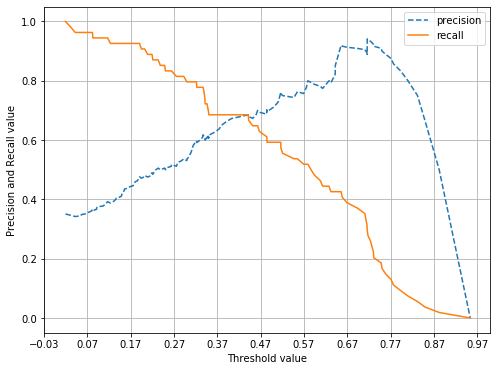

In [29]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1] # Positive일 확률만 뽑기
precision_recall_curve_plot(y_test, pred_proba_c1)

#### => 임계값을 0.42정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞춤. 하지만 두 지표 모두 0.7이 안되는 수치임. 임계값을 인위적으로 조적하기 전에 다시 데이터 값을 점검해보자.

In [30]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### => min값이 0인 칼럼이 많음. 예를들어 Glucoses는 포도당 수치인데 0이라는건 말이 안됨.
    Glucose의 피처 히스토그램 확인해보기

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

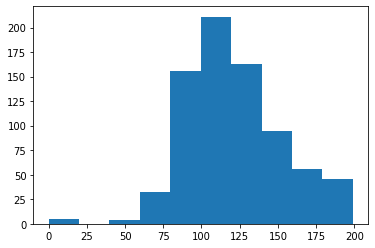

In [31]:
plt.hist(diabetes_data['Glucose'], bins=10)

#### => 0인 값이 존재하는걸 확인.
    min()이 0으로 돼 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인해보기.

In [32]:
# 0값을 검사할 피처 명 리스트
zero_features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count=diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count() 
        # zero_features 안의 칼럼 데이터 값이 0일때 그 feature칼럼의 0 데이터를 count해서 zero_count에 저장
    print('{0} 0 건수는 {1}, 퍼센트는 {2: .2f}%'.format(feature, zero_count, zero_count/total_count*100))

Glucose 0 건수는 5, 퍼센트는  0.65%
BloodPressure 0 건수는 35, 퍼센트는  4.56%
SkinThickness 0 건수는 227, 퍼센트는  29.56%
Insulin 0 건수는 374, 퍼센트는  48.70%
BMI 0 건수는 11, 퍼센트는  1.43%


#### => SkinThickness와 Insulin의 0값이 대단히 많음. 전체 데이터 수가 많지 않기때문에 이 데이터를 일괄적으로 삭제할 경우 학습을 효과적으로 수행하기 어려움. 위 피처의 0값을 평균 값으로 대체하자.

In [33]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)
    # .replace(찾을 값, 바꿀 값)

#### 0값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환하기.
    로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링 적용하는 것이 좋음. 이후에 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표 확인하기.

In [34]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, 
                                                 random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train) # 학습
pred=lr_clf.predict(X_test) # 예측
get_clf_eval(y_test, pred) # 평가

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 Score: 0.6804


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### => 데이터 변환과 스케일링을 통해 성능 수치가 좀 개선되었음. 하지만 여전히 재현율 수치는 개선이 필요함. 
    분류 결정 임계값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되는지 확인해보자.

In [44]:
thresholds=[0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[65 35]
 [11 43]]
정확도: 0.7013, 정밀도: 0.5513, 재현율: 0.7963, F1 Score: 0.6515, ROC AUC: 0.7231
임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963, F1 Score: 0.6825, ROC AUC: 0.7531
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1 Score: 0.6667, ROC AUC: 0.7411
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1 Score: 0.6667, ROC AUC: 0.7419
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1 Score: 0.6792, ROC AUC: 0.7533
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1 Score: 0.6857, ROC AUC: 0.7583
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1 Score: 0.6931, ROC AUC: 0.7641
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 Score: 0.6804, ROC AUC: 0.7556


#### => 임계값 0.48이 가장 좋음. 
    앞에서 학습된 로지스틱 회귀 모델을 이용해 임계값을 0.48로 낮춘 상태에서 다시 예측해보기.
    사이킷런의 predict() 메서드는 임계깞을 맘대로 변환할 수 없으므로 별도의 로직으로 이를 구해야 함.
    앞에서 살펴본 Binarizer 클래스를 이용해 predict_proba()로 추출한 예측 결과 확률 값을 변환해 변경된 임계값에 따른 예측 클래스 값을 구해보자.

In [45]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer=Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048) # 실제 y_test 레이블값과 임계값 0.48로 예측한 값 비교하여 평가

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1 Score: 0.6931, ROC AUC: 0.7641
